# Capitulo 2. Proyecto de Machine Learning

👀: verifica que si hayas instalado las librerías que vas a necesitar

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

### Queremos adivinar los precios de la vivienda 

División por distritos (Borough Flag) nos indica si es de Londres o de las afueras

Antes: Una persona, analisis de datos + formulas y estadística --> Decidir si invertir o no (25% sesgo)
Ahora: ML --> Decido si invertir o no (Si mi sesgo es menor de 25%, mi ML es útil)

#### Que nos tenemos que preguntar a la hora de enfrentarnos al análisis de un DataSet:

    ¿Aprendizaje supervisado o no?
        Nos vamos a fijar en si tenemos etiquetas o no.
            Como tenemos etiquetas, aplicaremos aprendizaje supervisado.

    ¿Regresión o clasificación?
        Que queremos hacer, predecir o clasificar...
            En nuestro caso queremos predecir el precio de una vivienda por lo que usaremos regresión.

            Regresión, ¿univariable o multivariable?
                Solo quiero que me devuelva el dato del precio de la vivienda por lo que univariable.
    
    ¿Batch u Online?
        Trabajar los datos en local o recibir los datos actualizados siempre que los pido
            Batch(Con variables locales guardando los datos para manipularlos en éstas)
    
    ¿Qué necesita mi equipo?
        Tengo que definir(y discutir) que me está pidiendo mi equipo. (quieren que devuelva un valor o una clasificación).
            Dependiendo de lo que nos pidan tendríamos que reconfigurar la salida de nuestro algoritmo.

In [24]:
## Importamos nuestras librerias principales panda, numpy, matplotlib, os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [25]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP =  "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/Capitulo_2/map/London_Borough_Excluding_MHW.shp"


def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path)

***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [26]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.
data_frame1 = extraer_datos(DOWNLOAD_ROOT,LONDON_SALARY)
data_frame2 = extraer_datos(DOWNLOAD_ROOT,LONDON_HOUSING)
data_frame1.head()


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,"33,020.00",NaN,48922,0,"6,581.00",NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,"21,480.00",NaN,23620,3,"162,444.00",NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,"19,568.00",NaN,23128,8,"313,469.00",NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,"18,621.00",NaN,21386,18,"217,458.00",NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,"18,532.00",NaN,20911,6,"260,317.00",NaN,NaN,NaN,1


In [27]:
data_frame2.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.00,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.00,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.00,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.00,NaN,1


In [28]:
#Fusionar los dos dataframe
data = pd.merge(data_frame1, data_frame2)
data.head()



,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,average_price,houses_sold,no_of_crimes
0,E09000001,city of london,1999-12-01,"33,020.00",NaN,48922,0,"6,581.00",NaN,NaN,NaN,1,169309,97.00,NaN
1,E09000002,barking and dagenham,1999-12-01,"21,480.00",NaN,23620,3,"162,444.00",NaN,NaN,NaN,1,68812,267.00,NaN
2,E09000003,barnet,1999-12-01,"19,568.00",NaN,23128,8,"313,469.00",NaN,NaN,NaN,1,149510,619.00,NaN
3,E09000004,bexley,1999-12-01,"18,621.00",NaN,21386,18,"217,458.00",NaN,NaN,NaN,1,93905,460.00,NaN
4,E09000005,brent,1999-12-01,"18,532.00",NaN,20911,6,"260,317.00",NaN,NaN,NaN,1,123398,395.00,NaN


In [29]:
#Filtrar los datos 
data_frame1 = data_frame1.filter(items=["median_salary","area","date"])
data_frame1.head()
    

,median_salary,area,date
0,"33,020.00",city of london,1999-12-01
1,"21,480.00",barking and dagenham,1999-12-01
2,"19,568.00",barnet,1999-12-01
3,"18,621.00",bexley,1999-12-01
4,"18,532.00",brent,1999-12-01


In [30]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               903 non-null    object 
 1   area               903 non-null    object 
 2   date               903 non-null    object 
 3   median_salary      881 non-null    float64
 4   life_satisfaction  320 non-null    float64
 5   mean_salary        903 non-null    object 
 6   recycling_pct      820 non-null    object 
 7   population_size    860 non-null    float64
 8   number_of_jobs     779 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       903 non-null    int64  
 12  average_price      903 non-null    int64  
 13  houses_sold        860 non-null    float64
 14  no_of_crimes       617 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 105.9+ KB


👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [31]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts()

area
city of london            21
westminster               21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
north east                21
lewisham                  21
north west                21
east midlands             21
west midlands             21
london                    21
south east                21
south west                21
inner london              21
outer london              21
merton                    21
lambeth                   21
barking and dagenham      21
greenwich                 21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
hackney                   21
kingston upon thames      21
hammersmi

In [32]:
#Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
pd.options.display.float_format = "{:,.2f}".format
data.describe()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,average_price,houses_sold,no_of_crimes
count,881.00,320.00,860.00,779.00,666.00,666.00,903.00,903.00,860.00,617.00
mean,"28,789.28",7.47,"2,542,412.43","1,318,030.81","372,490.27","881,468.15",0.77,"309,916.87","3,853.29","2,038.09"
std,"6,508.32",0.20,"8,007,687.76","4,283,011.30","2,157,060.24","3,690,376.14",0.42,"187,527.43","12,917.66",879.52
min,"15,684.00",7.00,"6,581.00","47,000.00",315.00,"5,009.00",0.00,"48,298.00",6.00,0.00
25%,"24,582.00",7.34,"215,899.75","87,000.00","2,960.00","87,635.50",1.00,"189,287.00",246.00,"1,542.00"
50%,"28,284.00",7.49,"268,889.50","137,000.00","4,323.00","102,402.00",1.00,"260,893.00",351.00,"2,008.00"
75%,"31,589.00",7.61,"359,452.25","338,000.00","8,220.00","126,276.00",1.00,"387,597.00",626.00,"2,402.00"
max,"61,636.00",7.96,"55,977,178.00","30,493,000.00","13,303,728.00","24,172,166.00",1.00,"1,364,185.00","119,458.00","7,461.00"


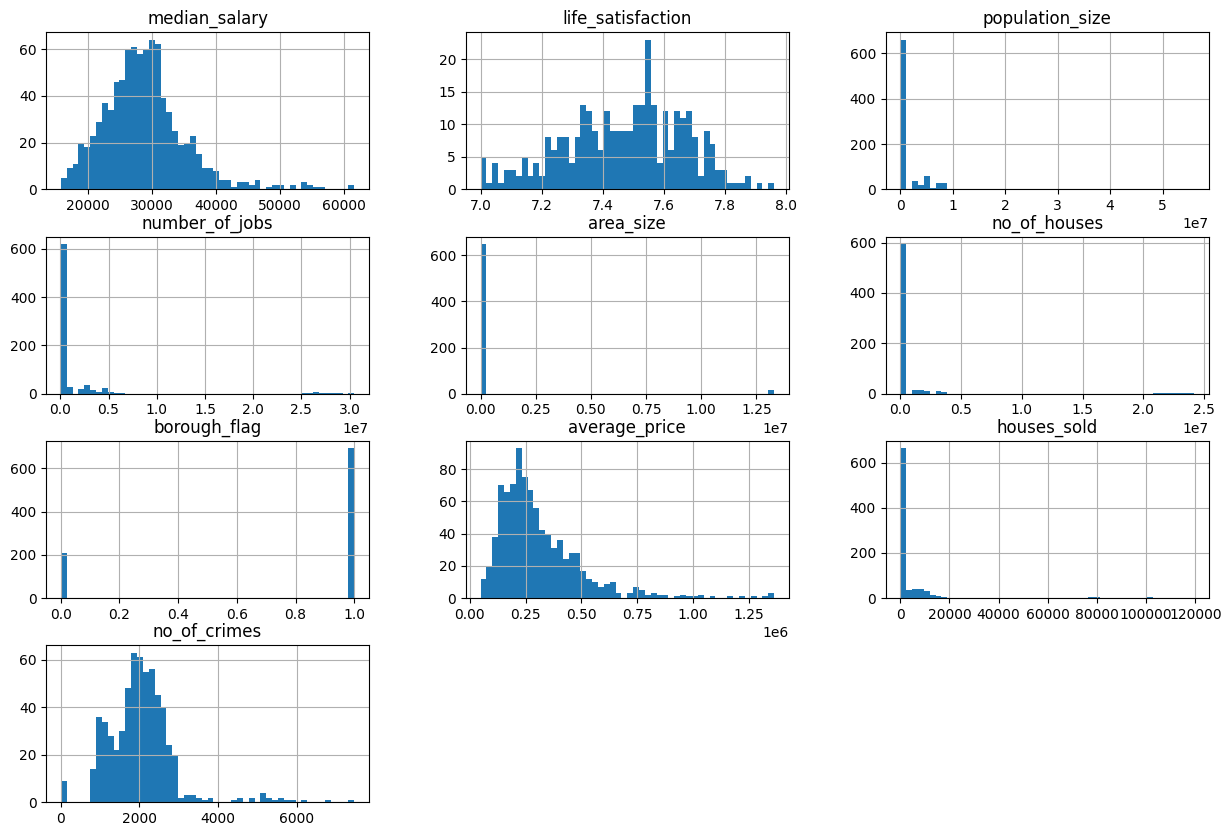

In [33]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
#%matplotlib inline

data.hist(bins=50,figsize=(15,10))
plt.show()


***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

Recuerden que nuestro set de prueba lo pondremos de lado por ahora, sin verlo. No sean tramposos ❌

In [34]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [35]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.
set_ent, set_prueba = train_test_split(data,test_size=0.3,random_state=11)


In [36]:
print(len(set_ent),len(set_prueba))

632 271


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

<Axes: >

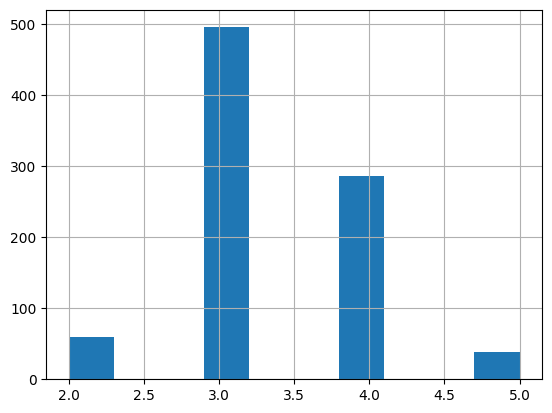

In [97]:
# Para categorizar una variable, ejemplo con 5 niveles. 
data["salary_cat"] = pd.cut(data["median_salary"],bins=[0.,10000,20000,30000,40000,np.inf],labels=[1, 2, 3, 4, 5])
                           
#Hacer un histograma de las categorías

data["salary_cat"].hist()

In [98]:
#Verificar que no existen datos en el bin #1
data["salary_cat"].value_counts()

salary_cat
3    496
4    287
2     59
5     39
1      0
Name: count, dtype: int64

<Axes: >

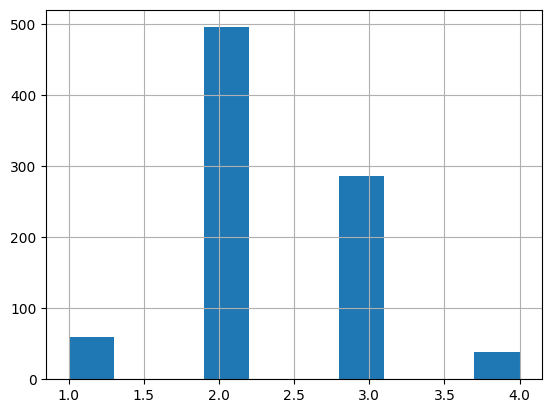

In [99]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset=["median_salary"])
data = data.reset_index()
data["salary_cat"] =pd.cut(data["median_salary"],bins=[10000,20000,30000,40000,np.inf],labels=[1,2,3,4])
data["salary_cat"].hist()

In [40]:
#Verifica que si se redefinieron las categorías 
data["salary_cat"].value_counts

<bound method IndexOpsMixin.value_counts of 0      3
1      2
2      1
3      1
4      1
      ..
876    2
877    3
878    3
879    2
880    3
Name: salary_cat, Length: 881, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]>

In [41]:
## Dividir datos basándonos en nuestras categorías de salarios
from sklearn.model_selection import StratifiedShuffleSplit

In [42]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=11)

In [43]:
# Creamos nuestras variables basándonos en nuestras categorías
for ent_index, prueba_index in split.split(data, data["salary_cat"]):#Definir de nuevo, entrenamiento y prueba peroteniedno en cuenta las nuevas etiquetas para eliminar sesgo
    cat_set_ent = data.loc[ent_index]
    cat_set_prueba = data.loc[prueba_index]


In [44]:
# Comprobación. Ya en porcentaje
cat_set_prueba["salary_cat"].value_counts()/len(cat_set_prueba)

salary_cat
2   0.56
3   0.32
1   0.07
4   0.05
Name: count, dtype: float64

***

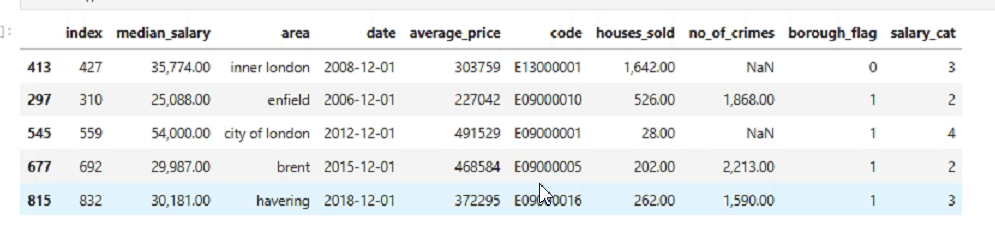

In [45]:
# Creamos dataframe para trabajar con el set de entrenamiento
df = cat_set_ent.copy()
df.head()

,index,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,average_price,houses_sold,no_of_crimes,salary_cat
413,427,E13000001,inner london,2008-12-01,"35,774.00",NaN,55236,NaN,"3,078,914.00",NaN,"32,796.00","1,359,764.00",0,303759,"1,642.00",NaN,3
297,310,E09000010,enfield,2006-12-01,"25,088.00",NaN,28912,30,"287,429.00","106,000.00","8,220.00","117,614.00",1,227042,526.00,"1,868.00",2
545,559,E09000001,city of london,2012-12-01,"54,000.00",NaN,86987,36,"7,604.00","449,000.00",315.00,"5,531.00",1,491529,28.00,NaN,4
677,692,E09000005,brent,2015-12-01,"29,987.00",7.55,34281,36,"324,012.00","136,000.00","4,323.00","115,598.00",1,468584,202.00,"2,213.00",2
815,832,E09000016,havering,2018-12-01,"30,181.00",7.68,34484,37,"257,810.00","108,000.00","11,446.00","101,993.00",1,372295,262.00,"1,590.00",3


***

## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

In [46]:
#Importar geopandas
import geopandas as gpd

#Leer el mapa
londres_map =gpd.read_file(LONDON_MAP)
londres_map.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


<Axes: >

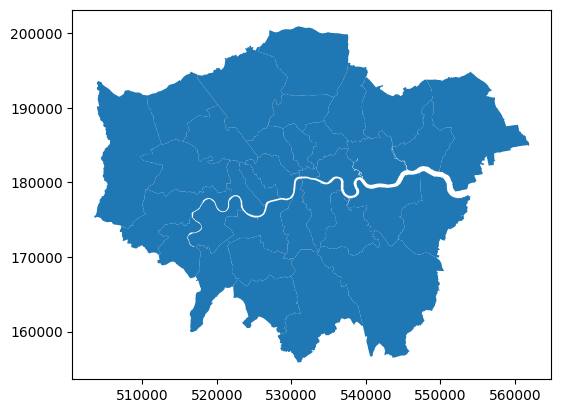

In [47]:
# Graficamos el mapa
londres_map.plot()

***

In [48]:
# Ajustamos los nombres de las columnas para despúes hacer un merge.
#utilizar lower para cambiar de mayúsculas a minúsculas 
londres_map.columns = londres_map.columns.str.lower()
print(londres_map)
londres_map = londres_map.rename({"name":"area","gss_code":"code"},axis=1)
londres_map["area"] = londres_map["area"].str.lower()

#Seleccionar columnas necesarias
londres_map = londres_map.filter(items=["area","code","hectares","geometry"])
londres_map.head()

                      name   gss_code  hectares  nonld_area ons_inner  \
0     Kingston upon Thames  E09000021  3,726.12        0.00         F   
1                  Croydon  E09000008  8,649.44        0.00         F   
2                  Bromley  E09000006 15,013.49        0.00         F   
3                 Hounslow  E09000018  5,658.54       60.76         F   
4                   Ealing  E09000009  5,554.43        0.00         F   
5                 Havering  E09000016 11,445.74      210.76         F   
6               Hillingdon  E09000017 11,570.06        0.00         F   
7                   Harrow  E09000015  5,046.33        0.00         F   
8                    Brent  E09000005  4,323.27        0.00         F   
9                   Barnet  E09000003  8,674.84        0.00         F   
10                 Lambeth  E09000022  2,724.94       43.93         T   
11               Southwark  E09000028  2,991.34      105.14         T   
12                Lewisham  E09000023  3,531.71    

,area,code,hectares,geometry
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,croydon,E09000008,"8,649.44","POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,bromley,E09000006,"15,013.49","POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,ealing,E09000009,"5,554.43","POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


***

In [49]:
# Seleccionar datos de nuestro set de entrenamiento
df_m = df.groupby("area").agg({"average_price":["mean"],"houses_sold":"sum"})

# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice
df_m.columns = ["avarage_price", "houses_sold"]
df_m.reset_index(inplace=True)
df_m.head()

,area,avarage_price,houses_sold
0,barking and dagenham,"168,421.00","2,188.00"
1,barnet,"355,681.32","7,847.00"
2,bexley,"207,725.47","4,662.00"
3,brent,"321,362.75","3,659.00"
4,bromley,"268,248.85","6,646.00"


In [50]:
# Combinar dtaframes
londres_map = pd.merge(londres_map,df_m,on="area")
londres_map.head()

,area,code,hectares,geometry,avarage_price,houses_sold
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.6 160201.8, 516407.3 160210.5...","319,607.31","3,168.00"
1,croydon,E09000008,"8,649.44","POLYGON ((535009.2 159504.7, 535005.5 159502, ...","244,736.65","7,352.00"
2,bromley,E09000006,"15,013.49","POLYGON ((540373.6 157530.4, 540361.2 157551.9...","268,248.85","6,646.00"
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.8 178100, 521967.7 178096.8, ...","271,604.13","3,787.00"
4,ealing,E09000009,"5,554.43","POLYGON ((510253.5 182881.6, 510249.9 182886, ...","301,230.31","5,764.00"


In [51]:
londres_map.plot?

Signature:      londres_map.plot(*args, **kwargs)
Type:           GeoplotAccessor
String form:    <geopandas.plotting.GeoplotAccessor object at 0x000001BA513C8B00>
File:           c:\users\abri\appdata\roaming\python\python312\site-packages\geopandas\plotting.py
Docstring:     
Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
column : str, np.array, pd.Series, pd.Index (default None)
    The name of the dataframe column, np.array, pd.Series, or pd.Index
    to be plotted. If np.array, pd.Series, or pd.Index are used then it
    must have same length as dataframe. Values are used to color the plot.
    Ignored if `color` is also set.
kind: str
    The kind of plots to produce. The default is to create a map ("geo").
    Other supported kinds of plots from pandas:

    - 'line' : line plot
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
  

***

(np.float64(500648.735),
 np.float64(564876.965),
 np.float64(153596.645),
 np.float64(203188.055))

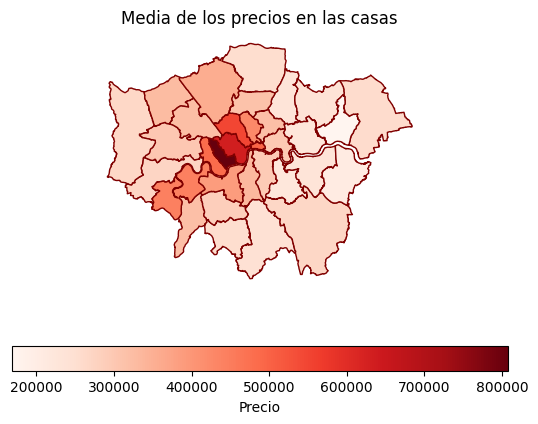

In [52]:
#Gráfica del promedio de los precios en las casas 
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal. 
plt = londres_map.plot(column = "avarage_price", #Columna en la que se basa la gráfica
                        cmap = "Reds", #Color gradiente de la gráfica
                        edgecolor="maroon", #Color de contorno
                        legend = True, legend_kwds ={"label":"Precio","orientation":"horizontal"}) #leyenda
plt.set_title("Media de los precios en las casas")
plt.axis("off")

💸: Recuerden que los precios son mayores en el centro de la cuidad

(np.float64(500648.735),
 np.float64(564876.965),
 np.float64(153596.645),
 np.float64(203188.055))

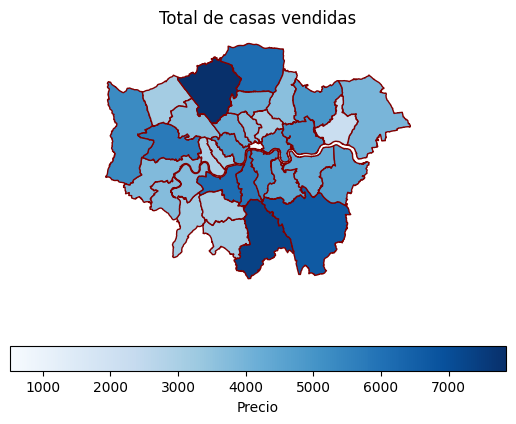

In [53]:
#Graficar ahora el total de las casa vendidas (utilizar el código anterior para no repetir)
plt = londres_map.plot(column = "houses_sold", #Columna en la que se basa la gráfica
                        cmap = "Blues", #Color gradiente de la gráfica
                        edgecolor="maroon", #Color de contorno
                        legend = True, legend_kwds ={"label":"Precio","orientation":"horizontal"}) #leyenda
plt.set_title("Total de casas vendidas")
plt.axis("off")

(np.float64(500648.735),
 np.float64(564876.965),
 np.float64(153725.58),
 np.float64(200480.42))

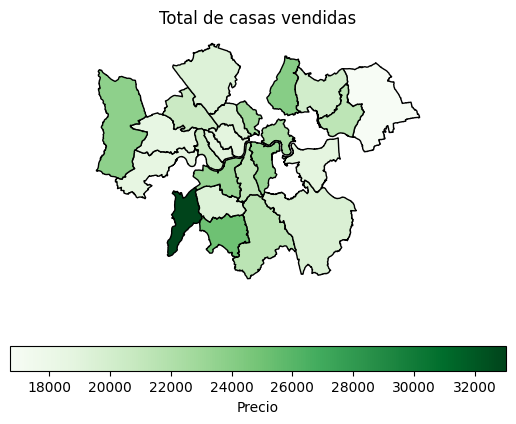

In [54]:
londres_map["median_salary"]=df["median_salary"]

plt = londres_map.plot(column = "median_salary", #Columna en la que se basa la gráfica
                        cmap = "Greens", #Color gradiente de la gráfica
                        edgecolor="black", #Color de contorno
                        legend = True, legend_kwds ={"label":"Precio","orientation":"horizontal"}) #leyenda
plt.set_title("Total de casas vendidas")
plt.axis("off")

***

## <span style="color:green">5. Medir la Correlación </span>


La correlación es la relación lineal que existe entre dos conjuntos de datos y su valor esta siempre entre -1 y 1

    +1 Correlación positiva perfecta --> Las variables se mueven en la misma dirección (Si una sube la otra también) Ej: M^2 de una casa // precio
    0 Sin Correalación --> No hay relación lineal y el movimiento de una no fecta a la otra Ej: M^2 de una casa // nº de crimenes
    -1 Negativa perfecta --> Las variables se mueven en direcciones opuestas Ej: km recorridos // Peso reducido

In [55]:
# Crear matriz de correlación
numeric_df = df.select_dtypes(include=["number"])
matriz = numeric_df.corr(method="pearson") #metodo.corr crea la matriz de correlación y usamos el método pearson que es el más común

# Comparar correlación
matriz["average_price"].sort_values(ascending=False)

average_price        1.00
median_salary        0.66
index                0.58
borough_flag         0.31
no_of_crimes         0.20
life_satisfaction    0.07
area_size           -0.16
no_of_houses        -0.16
number_of_jobs      -0.17
population_size     -0.18
houses_sold         -0.19
Name: average_price, dtype: float64

<Axes: >

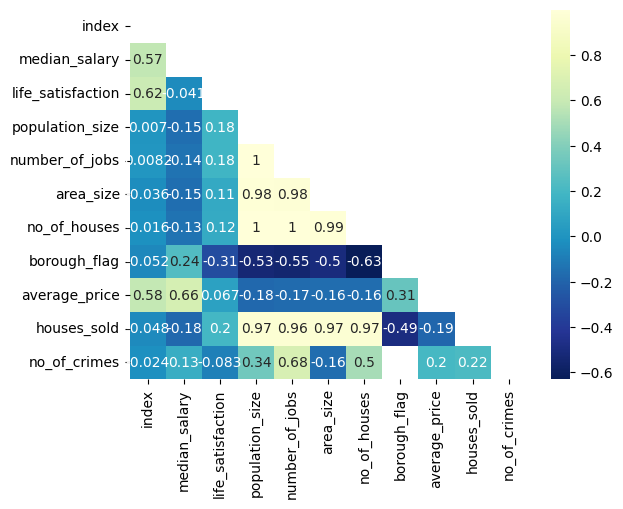

In [56]:
#Importar seaborn 
import seaborn as sb

# Crear vector
mask = np.triu(np.ones_like(matriz, dtype = bool))

# Graficar
plt = sb.heatmap(matriz, mask = mask,annot = True, cmap = "YlGnBu_r")
plt

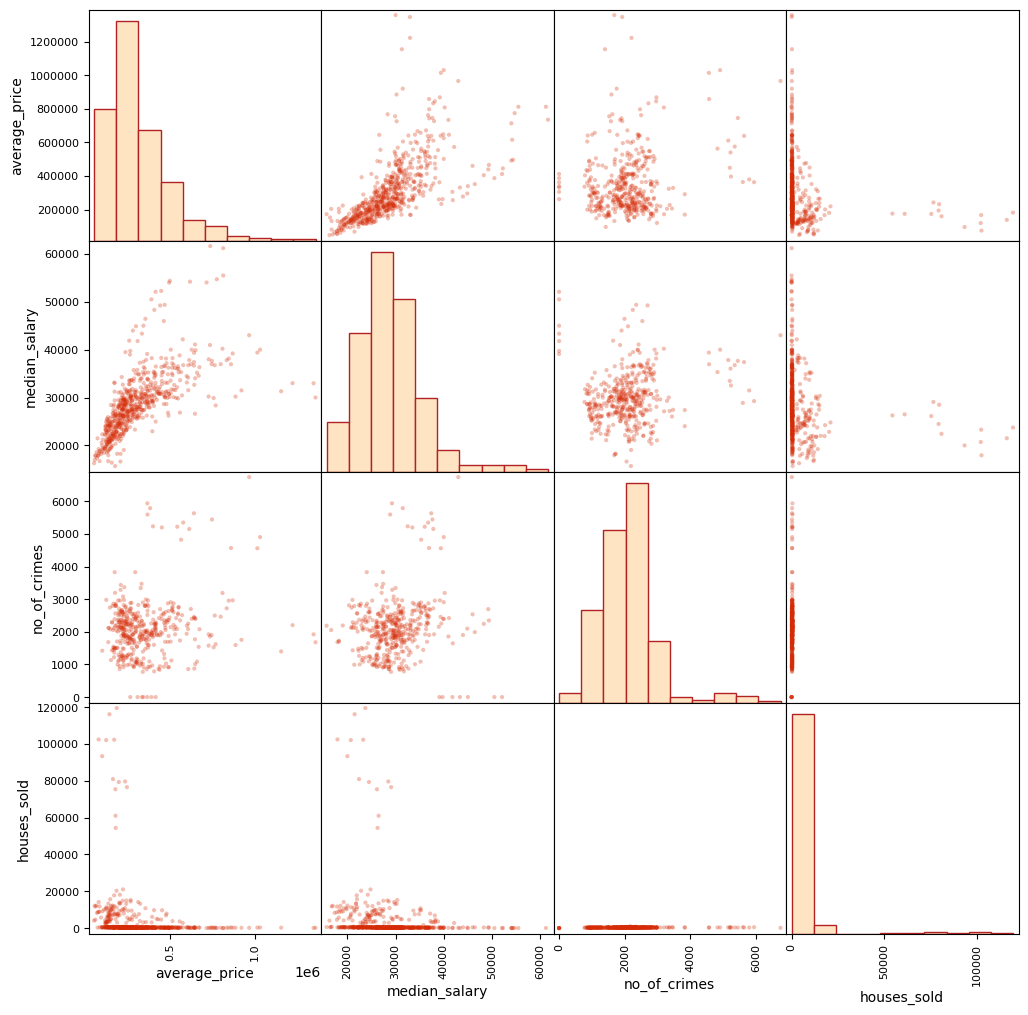

In [57]:
#Importar pandas 
from pandas.plotting import scatter_matrix

#Para graficar scatter_matrix...
columns=["average_price","median_salary","no_of_crimes","houses_sold"]
scatter_matrix(df[columns],figsize=(12,12),color = "#D52b06",alpha = 0.3,hist_kwds = {"color":{"bisque"},"edgecolor":"firebrick"});

<Axes: xlabel='median_salary', ylabel='average_price'>

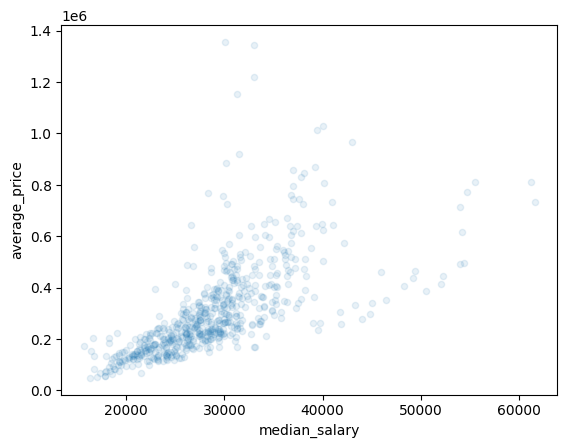

In [58]:
#Por si quieren ver una gráfica en específico más a detalle
df.plot(kind="scatter", x="median_salary", y="average_price",alpha=0.1)

***

## <span style="color:green">6. Combinación de Variables </span>


BUscamos crear variables sintéticas a partir de las existentes o comprobar que variables (incluyendo las sintéticas) tienen la correlación más alta con el "average_price" en este caso, ya que es la variable a predecir
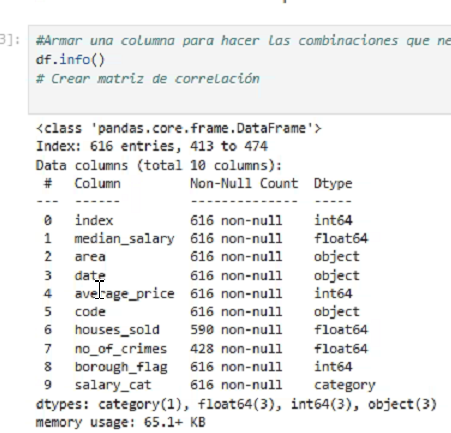

In [59]:
#Armar una columna para hacer las combinaciones que necesitamos
df["mas_crimen_por_casa_vendida"] = df["houses_sold"] * df ["no_of_crimes"]
# Crear matriz de correlación
numeric_df = df.select_dtypes(include=["number"])
matriz = numeric_df.corr(method="pearson")
matriz["average_price"].sort_values(ascending=False)

average_price                  1.00
median_salary                  0.66
index                          0.58
borough_flag                   0.31
no_of_crimes                   0.20
life_satisfaction              0.07
mas_crimen_por_casa_vendida   -0.10
area_size                     -0.16
no_of_houses                  -0.16
number_of_jobs                -0.17
population_size               -0.18
houses_sold                   -0.19
Name: average_price, dtype: float64

In [60]:
#Armar una columna para hacer las combinaciones que necesitamos
df["med_sal_respecto_al_centro"] = df["median_salary"] * df ["borough_flag"]
# Crear matriz de correlación
numeric_df = df.select_dtypes(include=["number"])
matriz = numeric_df.corr(method="pearson")
matriz["average_price"].sort_values(ascending=False)

average_price                  1.00
median_salary                  0.66
index                          0.58
med_sal_respecto_al_centro     0.52
borough_flag                   0.31
no_of_crimes                   0.20
life_satisfaction              0.07
mas_crimen_por_casa_vendida   -0.10
area_size                     -0.16
no_of_houses                  -0.16
number_of_jobs                -0.17
population_size               -0.18
houses_sold                   -0.19
Name: average_price, dtype: float64

***

***

## <span style="color:Blue">7. Transformación de Datos </span>
Ya hemos observado los datos, ahora vamos a prepararlos (limpiarlos)

In [61]:
# Crear Dataframe de predictores y variable a predecir ✂️
df_label = cat_set_ent["average_price"] #Cojo una sola columna de la cual sacaré las métricas de mis predicciones
#Nuevo dataframe sin average_price
df = cat_set_ent.drop("average_price", axis=1) # De la anterior copia saco la average_price que ya tengo en df_label

In [62]:
df.head()

,index,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,houses_sold,no_of_crimes,salary_cat
413,427,E13000001,inner london,2008-12-01,"35,774.00",NaN,55236,NaN,"3,078,914.00",NaN,"32,796.00","1,359,764.00",0,"1,642.00",NaN,3
297,310,E09000010,enfield,2006-12-01,"25,088.00",NaN,28912,30,"287,429.00","106,000.00","8,220.00","117,614.00",1,526.00,"1,868.00",2
545,559,E09000001,city of london,2012-12-01,"54,000.00",NaN,86987,36,"7,604.00","449,000.00",315.00,"5,531.00",1,28.00,NaN,4
677,692,E09000005,brent,2015-12-01,"29,987.00",7.55,34281,36,"324,012.00","136,000.00","4,323.00","115,598.00",1,202.00,"2,213.00",2
815,832,E09000016,havering,2018-12-01,"30,181.00",7.68,34484,37,"257,810.00","108,000.00","11,446.00","101,993.00",1,262.00,"1,590.00",3


In [63]:
df_label.head()

413    303759
297    227042
545    491529
677    468584
815    372295
Name: average_price, dtype: int64

##### OPCIONES CUANDO NOS FALTAN DATOS

    1.- Eliminar cada linea que tiene algo vacio. Demasiado costoso, perderíamos precisión del modelo porque no tiene tantos datos completos para compensar la perdida

    2.-Eliminar los datos vacios(Columnas dl df)

    3.- Rellenar los datos vacios con promedios

***

In [64]:
#Darte una idea de a qué variables le hace faltan datos
df.info()
#Calcular la suma de todos los vacíos  
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 413 to 474
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              616 non-null    int64   
 1   code               616 non-null    object  
 2   area               616 non-null    object  
 3   date               616 non-null    object  
 4   median_salary      616 non-null    float64 
 5   life_satisfaction  210 non-null    float64 
 6   mean_salary        616 non-null    object  
 7   recycling_pct      571 non-null    object  
 8   population_size    590 non-null    float64 
 9   number_of_jobs     543 non-null    float64 
 10  area_size          461 non-null    float64 
 11  no_of_houses       461 non-null    float64 
 12  borough_flag       616 non-null    int64   
 13  houses_sold        590 non-null    float64 
 14  no_of_crimes       428 non-null    float64 
 15  salary_cat         616 non-null    category
dtypes: category

index                  0
code                   0
area                   0
date                   0
median_salary          0
life_satisfaction    406
mean_salary            0
recycling_pct         45
population_size       26
number_of_jobs        73
area_size            155
no_of_houses         155
borough_flag           0
houses_sold           26
no_of_crimes         188
salary_cat             0
dtype: int64

In [65]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 
#df = df.drop("mean_salary",axis=1)
df = df.drop(
labels=["mean_salary","life_satisfaction","recycling_pct","number_of_jobs",
            "area_size","no_of_houses","population_size"],
    axis=1
)
#Es una fuente de info valiosa pero consideramos que en este caso al haber tantos huecos vacios no puedo predecir sus valores correctamente y preferimos eliminar la variable del modelo

In [66]:
#Tomamos la media 
median = df["houses_sold"].median() #Saco la media
#df = df.drop("mean_salary",axis=1)

#Llenamos los valores con la media
df["houses_sold"].fillna(median,inplace = True)#Aplico la 3ra opción, rellenar con la media los huecos vacios
#Verifica que no hay datos vacíos
df.isna().sum()

C:\Users\Abri\AppData\Local\Temp\ipykernel_14696\1882773053.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["houses_sold"].fillna(median,inplace = True)#Aplico la 3ra opción, rellenar con la media los huecos vacios


index              0
code               0
area               0
date               0
median_salary      0
borough_flag       0
houses_sold        0
no_of_crimes     188
salary_cat         0
dtype: int64

***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio

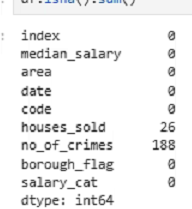

In [67]:
df = cat_set_ent.drop(
labels=["mean_salary","life_satisfaction","recycling_pct","number_of_jobs",
            "area_size","no_of_houses","population_size","no_of_crimes","average_price"],
    axis=1
)
df.isna().sum()


index             0
code              0
area              0
date              0
median_salary     0
borough_flag      0
houses_sold      26
salary_cat        0
dtype: int64

In [68]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. 
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer
from sklearn.impute import SimpleImputer

# 2. Crear objeto, en este caso se llamará imputer
imputer = SimpleImputer(strategy = "median")

df.isna().sum()
df.info()

# data numérico
df_num = df.drop(["area","date","code"],axis=1)

#Ejecuta Imputer
imputer.fit(df_num)#Calcular las medianas de cada columna

#Aplicar transform para rellenar las medianas 
X = imputer.transform(df_num) #Rellena cada columna con sus medianas 

#Regresarlo a dataframe 
df_tr = pd.DataFrame(X, columns=df_num.columns, index = df_num.index)
df_tr.head()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 413 to 474
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          616 non-null    int64   
 1   code           616 non-null    object  
 2   area           616 non-null    object  
 3   date           616 non-null    object  
 4   median_salary  616 non-null    float64 
 5   borough_flag   616 non-null    int64   
 6   houses_sold    590 non-null    float64 
 7   salary_cat     616 non-null    category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 55.5+ KB


,index,median_salary,borough_flag,houses_sold,salary_cat
413,427.00,"35,774.00",0.00,"1,642.00",3.00
297,310.00,"25,088.00",1.00,526.00,2.00
545,559.00,"54,000.00",1.00,28.00,4.00
677,692.00,"29,987.00",1.00,202.00,2.00
815,832.00,"30,181.00",1.00,262.00,3.00


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

In [69]:
#definir que variable vamos a cambiar a valor numérico
df_cat = df[["area"]]
#Convertir variables de texto en numéricas
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_oe = ordinal_encoder.fit_transform(df_cat)
#verificar que si se haya transformado
df_oe[:10]

array([[20.],
       [10.],
       [ 6.],
       [ 3.],
       [17.],
       [ 4.],
       [28.],
       [35.],
       [33.],
       [ 8.]])

In [70]:
#Por si quieres ver como funciona el encoder
ordinal_encoder.categories_

[array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
        'camden', 'city of london', 'croydon', 'ealing', 'east midlands',
        'enfield', 'england', 'greenwich', 'hackney',
        'hammersmith and fulham', 'haringey', 'harrow', 'havering',
        'hillingdon', 'hounslow', 'inner london', 'islington',
        'kensington and chelsea', 'kingston upon thames', 'lambeth',
        'lewisham', 'london', 'merton', 'newham', 'north east',
        'north west', 'outer london', 'redbridge', 'richmond upon thames',
        'south east', 'south west', 'southwark', 'sutton', 'tower hamlets',
        'waltham forest', 'wandsworth', 'west midlands', 'westminster'],
       dtype=object)]

In [71]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
#Crear objeto
encoder = OneHotEncoder()
#Ajustar
df_1hot = encoder.fit_transform(df_cat)
#obligar a que nos muestre la matriz 
df_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(616, 43))

***

## <span style="color:Blue">9. Escalación de variables </span>


In [72]:
df["houses_sold"].mean()

np.float64(3812.3322033898303)

In [73]:
df_label.mean()

np.float64(309551.88474025973)

In [74]:
prueba = pd.DataFrame({"col1":[100,200,300,999],"col2":[1000,2000,3000,9999],"col3":[-10,0,1,2]})
prueba

,col1,col2,col3
0,100,1000,-10
1,200,2000,0
2,300,3000,1
3,999,9999,2


#### <span style="color:Blue">9.1 Normalización </span>

In [75]:
#Importar MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Creamos el objeto 
scaler = MinMaxScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(prueba),columns=prueba.columns,index=prueba.index)

,col1,col2,col3
0,0.00,0.00,0.00
1,0.11,0.11,0.83
2,0.22,0.22,0.92
3,1.00,1.00,1.00


#### <span style="color:Blue">9.2 Estandarización </span>

In [76]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 
from sklearn.preprocessing import StandardScaler

#Crea objeto
scaler = StandardScaler()
#Hacer un dataframe con la transformación
pd.DataFrame(scaler.fit_transform(prueba),columns=prueba.columns,index=prueba.index)

,col1,col2,col3
0,-0.85,-0.85,-1.71
1,-0.57,-0.57,0.36
2,-0.28,-0.28,0.57
3,1.70,1.70,0.78


La estandarización asegura que, despues de la transformacion cada columna(variable)tendrá una media de 0 y una deviación estándar de 1.

Esto es necesario porque, sin estandarizar, una columna con valores muy grandes (ej. Salario en miles) podría dominar la distancia y el cálculo en el modelo, haciendo que el impacto de una columna con valores pequeños (Ej: nº de crimenes) sea insignificante. La estandarización pone a todas las variables en la misma escala

***

## <span style="color:Blue">10. Pipeline </span>


Pipeline (Tubería) Es una clase de Scikitlearn, que permite quitar los vacíos, escalar, alterar variables, etc y al final sacar un resultado

In [77]:
# Crear función de pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

pipeline = Pipeline([("remover",RobustScaler()),("rellenar",SimpleImputer(strategy="median")),("escalar",StandardScaler())])

pd.DataFrame(pipeline.fit_transform(prueba), columns=prueba.columns,index=prueba.index)

,col1,col2,col3
0,-0.85,-0.85,-1.71
1,-0.57,-0.57,0.36
2,-0.28,-0.28,0.57
3,1.70,1.70,0.78


In [78]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)
from sklearn.compose import ColumnTransformer
num = list(df_num)
cat = ["area"]

pipeline_completo = ColumnTransformer([("num",pipeline,num),("cat",OneHotEncoder(),cat)])
#Hacer un datframe que usaremos para la regresión linea
df_preparado = pipeline_completo.fit_transform(df)
#Visualiza los datos 
df_preparado

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3696 stored elements and shape (616, 48)>

***

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [79]:
## Hacer Regresión Lineal (AL FIN)
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(df_preparado, df_label)

algunos_datos = df.iloc[:5]
datos_predecir = df_label.iloc[:5]
datos_transformados = pipeline_completo.transform(algunos_datos)

print("Prediccion",reg_lin.predict(datos_transformados))
print("\nOriginales:", list(datos_predecir))

Prediccion [341100.16630462 205477.11063647 547797.70977617 414420.99863149
 407671.95658875]

Originales: [303759, 227042, 491529, 468584, 372295]


In [80]:
#Análisis preambultario de los errores
algunos_datos = df.iloc[:5]
datos_predecir = df_label.iloc[:5]
datos_transformados = pipeline_completo.transform(algunos_datos)

vp=list(reg_lin.predict(datos_transformados))
vr=list(datos_predecir)

vp = pd.Series(vp)
vr = pd.Series(vr)

abs((vr-vp)/vr).mean() #Error promedio de predicción (de los primeros 5 valores)

np.float64(0.10860034499446077)

***

#### <span style="color:purple">11.1 RMSE </span>

In [81]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE
from sklearn.metrics import mean_squared_error
prediccion = reg_lin.predict(df_preparado)
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

np.float64(64654.33804449993)

In [82]:
#Sacar el promedio 
df_label.mean()

np.float64(309551.88474025973)

In [83]:
#Calcular el porcentaje de acierto
print(f'El % de error relativo es:{error/df_label.mean()*100:.2f}%')

El % de error relativo es:20.89%


***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

Un árbol de decisión es un modelo de apredizaje automático que utiliza una estructura de flujo descendente similar a un organigrama para clasificar o predecir un resultado tomando decisiones secuenciales basadas en las características de los datos

In [84]:
# importar DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#crear objeto 
reg_arbol = DecisionTreeRegressor()

#correrlo
reg_arbol.fit(df_preparado,df_label)
prediccion = reg_arbol.predict(df_preparado)

#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error 

np.float64(0.0)

Cuidado con Overfitting: Se nos ha ajustado tanto el modelo a los datos que tenemos que cuando intentamos predecir un elemento con datos externos no lo hara bien

***

#### <span style="color:purple">11.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [85]:
#Importar cross_val_score, creo objeto, corro mi función
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(reg_arbol, df_preparado, df_label, scoring="neg_mean_squared_error",cv=10)
rmse = np.sqrt(-resultados)
rmse

array([88113.28736001, 68247.6166078 , 54970.06878821, 56803.98398823,
       56942.82106413, 78971.89361392, 78602.42544771, 75545.62904846,
       67175.23565895, 59969.78832439])

In [86]:
#Calcular el porcentaje de error promedio de predicción pasando por validación cruzada 
print(f'El % de error relativo es:{rmse.mean()/df_label.mean()*100:.2f}%')

El % de error relativo es:22.14%


***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>

El bosque aleatorio es un conjunto de arboles de decisión, cada uno saca un valor y se hace la media(votan) para sacar un promedio que será el resultado final.

    Objetivo: Ver si hay algo mejor que la regresión lineal para calcular lo que queremos

    Este proceso tarda más pero para muchos es la opción ideal pues sin pensar ya hacen un filtro correcto

In [87]:
#Importar RandomForestRegressor, creo objeto, corro mi función
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor()
reg_forest.fit(df_preparado,df_label)
prediccion = reg_forest.predict(df_preparado)

#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

np.float64(20946.79530699815)

In [88]:
#Calcular el el promedio de la suma de los errores al cuadrado
resultados = cross_val_score(reg_forest, df_preparado, df_label, scoring="neg_mean_squared_error",cv=10)
rmse = np.sqrt(-resultados)
rmse

array([83136.74187103, 58824.75834012, 45098.41718222, 61385.6919038 ,
       49552.74071982, 52880.69056214, 78678.10976958, 54906.46960369,
       58889.72343574, 48733.88033049])

In [89]:
#Calcular el porcentaje de acierto de bosque aleatorio
print(f'El % de error relativo es:{rmse.mean()/df_label.mean()*100:.2f}%')

El % de error relativo es:19.13%


Si estamos en una empresa normalita de analisis de datos, haremos siempre el bosque aleatorio que es más rápido que buscar la opción más óptima. Si esatamos en una empresa importante, bsucaremos la opción más óptima.

***

## <span style="color:purple">12. Afinar el modelo </span>

Ajustar los hiperparámetros: En este caso los modificables en el bosque aleatorio son, nº estimadores y la mayor cantidad de variables.

### <span style="color:purple">12.1 Grid Search</span> Va a hacer el modelo con varios ajustes en los hiperparámetros, hasta que encuentre el más adecuado

In [90]:
#Importar GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]}] #Alguna Combinación de estos 2 nos va a dar el mejor resultado

grid_search = GridSearchCV(reg_forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(df_preparado,df_label)



,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [91]:
#Calcular el mejor parametro
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [92]:
#Ver el error
np.sqrt(-grid_search.best_score_)

np.float64(64596.049010016926)

In [93]:
print(f'El % de error relativo es:{np.sqrt(-grid_search.best_score_)/df_label.mean()*100:.2f}%')

El % de error relativo es:20.87%


In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

#Dataset teórico
numeric_features = ["edad","salario_anual","antiguedad"]
categorical_features = ["ciudad","tipo_contrato"]

#Creación de Transformadores o filtros
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())]) #Transformación de las columnas numéricas
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))]) #Transformación de las columnas categóricas

#Unir transformadores en el pre-procesador (ColumnTransformer)
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)], remainder='passthrough') #Mantiene las columnas no especificadas

#Crear el Pipeline que combine el procesador con el modelo(RandomForest)
pipe = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(random_state=11))])

#Aplicar el Grid Search con un nuevo Pipeline

#Definir cuadrícula de parametros que aplciaremos en el GridSearch
param_grid = {
    "regressor__n_stimators": [50, 100,200], # nº de arboles
    "regressor__max_depth": [10, 20, None], # Profundidad máxima(del flujo en el algoritmo)
    "regressor__min_samples_leaf": [1,2,4], # Mínimo de muestras por hoja
    "regressor__max_features": [1.0,"sqrt","log2"] # Cantidad de features a cosniderar
}

#Definir el Pipeline de GridSearch
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#Entrenamiento
# ... ETC ...


In [95]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

### <span style="color:purple">12.2 set de prueba</span>

In [96]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 
modelo_final = grid_search.best_estimator_


#Aquí definimos cuál será nuestra variable a predecir y las predichas 
Y = cat_set_prueba["average_price"].copy()
X = cat_set_prueba.drop("average_price",axis=1)


#Ahora, sí. El pipeline para limpieza de datos 
X_preparada = pipeline_completo.transform(X)
prediccion_final = modelo_final.predict(X_preparada)

#Por último, ver el error del modelo 
mse_final = mean_squared_error(Y,prediccion_final)
rmse = np.sqrt(mse_final)
rmse

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
#Ver el porcentaje de acierto
print(f'El % de error relativo es:{rmse/Y.mean()*100:.2f}%')

El % de error relativo es:19.38%


Tarea:
Hacer lo mismo con un dataset nuevo de Kaggel con lo que hemos aprendido. (Todo en Visual Studio Code)

    1 Extraer los datos
    2 Mostrarlos/analizarlos
    3 Adecuar/normalizar los datos
    4 Entrenar el modelo
    5 Sacar resultado y mostrar el error relativo en la prueba final